# 第四章 元数据提取和分块

<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#一引言" data-toc-modified-id="一、引言">一、引言</a></span></li>
        <li><span><a href="#二元数据" data-toc-modified-id="二、元数据">二、元数据</a></span></li>
        <li><span><a href="#三语义搜索与向量数据库" data-toc-modified-id="三、语义搜索与向量数据库">三、语义搜索与向量数据库</a></span></li>
        <li><span><a href="#四混合搜索" data-toc-modified-id="四、混合搜索">四、混合搜索</a></span></li>
            <ul class="toc-item">
                <li><span><a href="#41-示例瑞士冬季运动电子出版物" data-toc-modified-id="4.1 示例：瑞士冬季运动电子出版物">4.1 示例：瑞士冬季运动电子出版物</a></span></li>
                <ul class="toc-item">
                    <li><span><a href="#411-导入相应库" data-toc-modified-id="4.1.1 导入相应库">4.1.1 导入相应库</a></span></li>
                    <li><span><a href="#412-找到对应章节相关联元素" data-toc-modified-id="4.1.2 找到对应章节相关联元素">4.1.2 找到对应章节相关联元素</a></span></li>
                    <li><span><a href="#413-用-unstructured-api-获取结构化数据" data-toc-modified-id="4.1.3 用 Unstructured API 获取结构化数据">4.1.3 用 Unstructured API 获取结构化数据</a></span></li>
                    <li><span><a href="#414-找到对应章节所需元素" data-toc-modified-id="4.1.4 找到对应章节所需元素">4.1.4 找到对应章节所需元素</a></span></li>
                    <li><span><a href="#415-将文档载入到向量数据库" data-toc-modified-id="4.1.5 将文档载入到向量数据库">4.1.5 将文档载入到向量数据库</a></span></li>
                    <li><span><a href="#416-在数据库中查看结果" data-toc-modified-id="4.1.6 在数据库中查看结果">4.1.6 在数据库中查看结果</a></span></li>
                    <li><span><a href="#417-用元数据执行混合搜素" data-toc-modified-id="4.1.7 用元数据执行混合搜素">4.1.7 用元数据执行混合搜素</a></span></li>
                </ul>
            </ul>
        <li><span><a href="#五内容分块" data-toc-modified-id="五、内容分块">五、内容分块</a></span></li>
        <li><span><a href="#六中文示例" data-toc-modified-id="六、中文示例">六、中文示例</a></span></li>
        <li><span><a href="#七总结" data-toc-modified-id="七、总结">七、总结</a></span></li>
    </ul>
</div>

## 一、引言
***

在本课程中，我们深入探讨了如何通过元数据的提取与应用来增强文档内容的处理和搜索效率。通过学习，我们获得了以下几方面的知识与技能：

- **元数据的理解与应用**：我们了解到元数据是文档处理过程中提取的额外信息，它既包括从文档本身提取的信息（如最后修改日期、文件名），也包括在预处理过程中推断出的信息（如元素类型、层级关系）。这些元数据对于构建 RAG 应用程序，尤其是混合搜索功能至关重要。

- **语义搜索与向量数据库**：我们学习了在 RAG 系统中，如何通过语义搜索来检索与查询相似的文档。通过将文档加载到向量数据库中，并基于相似性得分（一种基于距离的度量）来搜索文档，我们可以更有效地找到所需信息。

- **混合搜索的优势**：我们认识到在某些情况下，单一的相似性搜索可能不足以满足需求，例如在面对大量匹配项或需要根据时间等其他信息进行结果偏向时。混合搜索通过结合相似性搜索和元数据的结构化信息，提供了过滤选项，使我们能够更精确地定位信息。

- **文档的智能分块**：我们掌握了如何利用文档元素的元数据来智能分块，而不是简单地按照字符或令牌数量进行等大小分块。通过识别文档中的标题、段落等元素，并将它们逻辑地组合成块，我们可以构建更连贯、更相关的信息块，从而提高搜索的准确性和效率。

- **实践操作技能**：通过具体的实践操作，我们学习了如何使用非结构化库和 ChromaDB 等工具来处理文档、执行搜索和构建混合搜索系统。这些技能对于开发高效的信息检索和处理系统至关重要。

- **成本效益与资源优化**：我们认识到通过智能分块和利用元数据，不仅可以提高搜索质量，还可以节省推理成本，特别是对于那些有上下文窗口限制或成本较高的 LLM。

通过本课程的学习，我们不仅获得了理论知识，还通过实践加深了对文档处理和搜索优化技术的理解，这将为我们在未来的工作中提供强大的支持和帮助。

## 二、元数据
***

在本课程中，我们专注于学习元数据的概念及其重要性。元数据是预处理文档时提取的额外信息，它对文档或文档中的元素进行描述。我们了解到元数据可以分为两个级别：

1. **文档级别**：这类元数据描述了整个文档的特征，例如最后修改日期或文件名。

2. **元素级别**：这类元数据则更具体，描述了文档中各个元素的特征，如类别、层级关系等。

元数据的实际应用包括：

- **辅助信息**：元数据为我们提供了文本内容之外的辅助信息，这些信息在构建 RAG 应用时特别有用，尤其是在混合搜索系统中。

- **结构化与非结构化信息**：元数据既可以是直接从文档中提取的结构化信息，如文件名，也可以是在预处理过程中推断出的非结构化信息，如元素类型或层级关系。

- **实际示例**：在实践中，元数据包括了文本内容之外的诸多细节，比如页码、语言、文件名和元素类型等。这些信息在构建 RAG 应用的混合搜索系统时非常有用，因为它们可以帮助我们更精确地定位和检索信息。

通过学习元数据，我们能够更好地理解文档的结构和内容，这对于后续的语义搜索和混合搜索至关重要。元数据的提取和应用，为我们在处理大量文档和信息时提供了一种有效的方法，使得信息检索更加准确和高效。

## 三、语义搜索与向量数据库
***

在 RAG 系统中，我们通常通过语义搜索从向量数据库中检索文档。语义搜索寻找与查询相似的内容。详细来讲，在检索增强生成系统中，通常的第一步是从向量数据库中检索文档。因此，在将文档加载到向量数据库中后，您运行一个查询，然后根据相似性得分（基于距离的度量）搜索文档。语义搜索检索与查询相似的文档，从而促进了为 LLM（大型语言模型）生成提示的过程。

**但有些情况下，相似搜索并不理想**，无法返回您的 RAG 系统所需的信息。在某些情况下，可能会出现匹配项过多的情况。当文档涉及相同主题时，就会发生这种情况，如果您搜索该主题，将会返回大量信息。您可能还希望根据其他信息偏置您的结果，例如更近期的信息。因此，您可能不只是想要最相似的内容，而是想要发生在特定时间范围内的最相似的内容。

## 四、混合搜索
***

**为了解决这些挑战，我们引入了混合搜索**。混合搜索将**语义搜索**与从文档中提取的**结构化元数据**相结合。**元数据**可作为**过滤选项**，允许将搜索限制在特定部分或基于其他标准，如最近性。

### 4.1 示例：瑞士冬季运动电子出版物

#### 4.1.1 导入相应库

In [1]:
# 控制 Python 程序中的警告信息输出，避免产生一些不影响程序执行但可能会令用户感到困惑的警告信息。
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 设置日志记录器行为
import logging
logger = logging.getLogger()
# CRITICAL 是日志记录器的最高级别。这意味着除最高级别外的其他日志消息都将被忽略，有助于减少程序执行过程中产生的日志消息
logger.setLevel(logging.CRITICAL)

In [3]:
import json
from IPython.display import JSON

from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.chunking.title import chunk_by_title
from unstructured.staging.base import dict_to_elements

# ChromaDB是一个内存中的向量数据库，在这节课中，您将使用它来进行相似搜索
import chromadb

#### 注：Windows下相应环境变量可通过以管理员方式打开 cmd，然后设定以下：

In [ ]:
setx DLAI_API_KEY "<YOUR API KEY>"
setx DLAI_API_URL "<API URL>"

In [4]:
# 载入相应环境变量
from Utils_Ch4 import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()

# 调用 Unstructured API
s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

#### 4.1.2 找到对应章节相关联元素

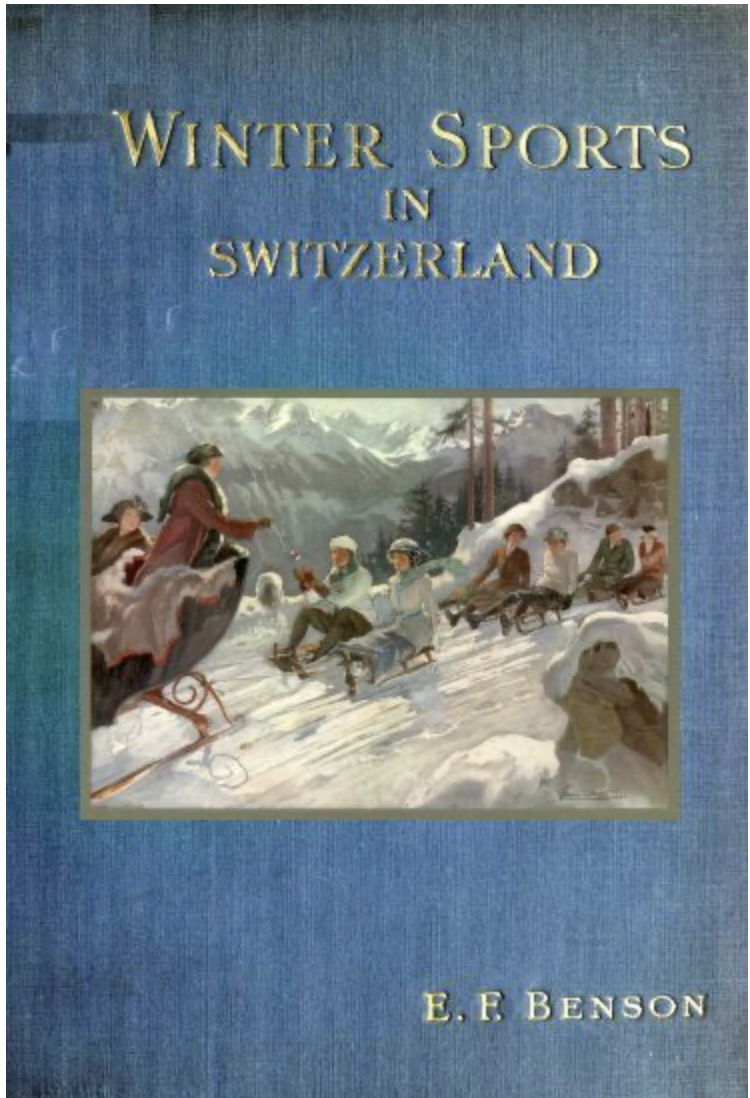

In [5]:
# 查看对应 pdf 封面（在这里是一个图片）
from IPython.display import Image
Image(filename='images/4-1.png', height=400, width=400)

![image1](images/4-1.png)

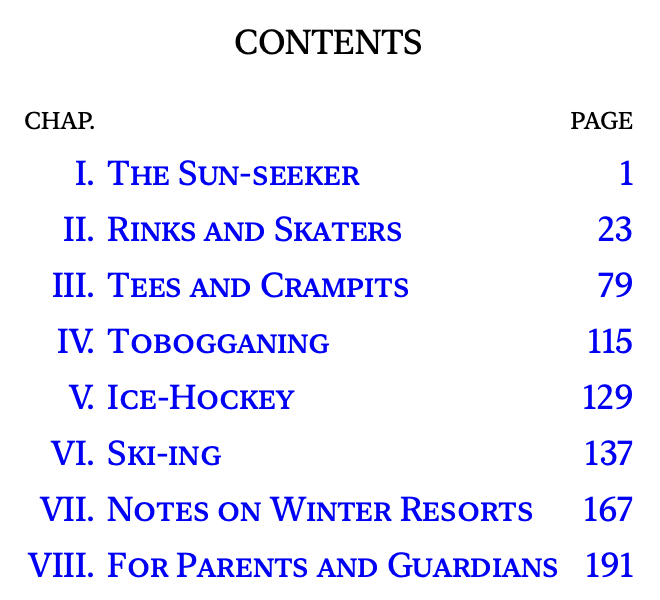

In [6]:
# 查看目录（这里直接使用图片）
Image(filename="images/4-2.png", height=400, width=400) 

![image2](images/4-2.png)

#### 注：查看 pdf 直接点击下方
- <a href="example_files/winter-sports.pdf">冬季运动（查看 pdf） -- 点击这里</a>

#### 4.1.3 用 Unstructured API 获取结构化数据

In [6]:
filename = "example_files/winter-sports.epub"

with open(filename, "rb") as f:
    # shared.Files 可能是用于封装文件内容和文件名
    files=shared.Files(
        # 以二进制格式读取
        content=f.read(),
        file_name=filename,
    )

# shared.PartitionParameters 可能是用于定义文件分区处理的参数
req = shared.PartitionParameters(files=files)

In [7]:
# 开始拆分
try:
    resp = s.general.partition(req)
# 处理异常
except SDKError as e:
    print(e)

In [46]:
# 查看部分转换结果
print(json.dumps(resp.elements[0:3], indent=2))

[
  {
    "type": "Title",
    "element_id": "6c6310b703135bfe4f64a9174a7af8eb",
    "text": "The Project Gutenberg eBook of Winter Sports in\nSwitzerland, by E. F. Benson",
    "metadata": {
      "languages": [
        "eng"
      ],
      "filename": "winter-sports.epub",
      "filetype": "application/epub"
    }
  },
  {
    "type": "NarrativeText",
    "element_id": "9ecb42d4f263247a920448ed98830388",
    "text": "\nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online at\n",
    "metadata": {
      "languages": [
        "eng"
      ],
      "parent_id": "6c6310b703135bfe4f64a9174a7af8eb",
      "filename": "winter-sports.epub",
      "filetype": "application/epub"
    }
  },
  {
    "type": "NarrativeText",
    "element_id": "87ad8d091d5904b17bc345b10

#### 4.1.4 找到对应章节所需元素

In [9]:
# 将符合特定条件元素形成列表
# 结构化数据中对应元素需满足对应 type（类型）属于 Title（标题）且 hockey 这个词在对应元素 text.lower()（小写文本）中
[x for x in resp.elements if x['type'] == 'Title' and 'hockey' in x['text'].lower()]

[{'type': 'Title',
  'element_id': '6cf4a015e8c188360ea9f02a9802269b',
  'text': 'ICE-HOCKEY',
  'metadata': {'languages': ['eng'],
   'filename': 'winter-sports.epub',
   'filetype': 'application/epub'}},
 {'type': 'Title',
  'element_id': '4ef38ec61b1326072f24495180c565a8',
  'text': 'ICE HOCKEY',
  'metadata': {'languages': ['eng'],
   'filename': 'winter-sports.epub',
   'filetype': 'application/epub'}}]

In [10]:
# 目标是寻找对应章节所对应元素
chapters = [
    "THE SUN-SEEKER",
    "RINKS AND SKATERS",
    "TEES AND CRAMPITS",
    "ICE-HOCKEY",
    "SKI-ING",
    "NOTES ON WINTER RESORTS",
    "FOR PARENTS AND GUARDIANS",
]

In [11]:
chapter_ids = {}
# 如果结构化数据中的元素满足某些条件则取出来
for element in resp.elements:
    for chapter in chapters:
        if element["text"] == chapter and element["type"] == "Title":
            chapter_ids[element["element_id"]] = chapter
            break

In [12]:
chapter_ids

{'a37f63b4dd470e0bc0d4d92e66758183': 'THE SUN-SEEKER',
 '1766cdc7e0052527c77938d0a51d0495': 'RINKS AND SKATERS',
 '99ff7a9efd2518b35b27b9bee204fc1d': 'TEES AND CRAMPITS',
 '6cf4a015e8c188360ea9f02a9802269b': 'ICE-HOCKEY',
 'f342e4727343974b173134e6931b9158': 'SKI-ING',
 'a784c0efc6886ee75314b5fbb7b60ba0': 'NOTES ON WINTER RESORTS',
 'ecc5c7f65b2e27481f7a70508aa9a4c4': 'FOR PARENTS AND GUARDIANS'}

In [49]:
# 将键值对互换
chapter_to_id = {v: k for k, v in chapter_ids.items()}
chapter_to_id

{'THE SUN-SEEKER': 'a37f63b4dd470e0bc0d4d92e66758183',
 'RINKS AND SKATERS': '1766cdc7e0052527c77938d0a51d0495',
 'TEES AND CRAMPITS': '99ff7a9efd2518b35b27b9bee204fc1d',
 'ICE-HOCKEY': '6cf4a015e8c188360ea9f02a9802269b',
 'SKI-ING': 'f342e4727343974b173134e6931b9158',
 'NOTES ON WINTER RESORTS': 'a784c0efc6886ee75314b5fbb7b60ba0',
 'FOR PARENTS AND GUARDIANS': 'ecc5c7f65b2e27481f7a70508aa9a4c4'}

In [47]:
# 将 ICE-HOCKEY 这一章节的元素全部取出，然后查看第一个
[x for x in resp.elements if x["metadata"].get("parent_id") == chapter_to_id["ICE-HOCKEY"]][0]

{'type': 'NarrativeText',
 'element_id': 'c7c8e2f178cb0dc273ba7e811372640b',
 'text': 'Many of the Swiss winter-resorts can put\ninto the field a very strong ice-hockey team, and fine teams from other\ncountries often make winter tours there; but the ice-hockey which the\nordinary winter visitor will be apt to join in will probably be of the\nmost elementary and unscientific kind indulged in, when the skating day\nis drawing to a close, by picked-up sides. As will be readily\nunderstood, the ice over which a hockey match has been played is\nperfectly useless for skaters any more that day until it has been swept,\nscraped, and sprinkled or flooded; and in consequence, at all Swiss\nresorts, with the exception of St. Moritz, where there is a rink that\nhas been made for the hockey-player, or when an important match is being\nplayed, this sport is supplementary to such others as I have spoken of.\nNobody, that is, plays hockey and nothing else, since he cannot play\nhockey at all till the

#### 4.1.5 将文档载入到向量数据库

In [14]:
# chromadb.PersistentClient() 用于创建一个用于持久性客户端的类
# path 指定了客户端数据存储的路径，即数据库文件的位置
# settings 用于配置客户端行为，例如是否允许重置
client = chromadb.PersistentClient(path="chroma_tmp", settings=chromadb.Settings(allow_reset=True))
# 重置客户端
client.reset()

True

In [15]:
# 创建一个新集合，名称为 winter_sports，相似度方法使用 cosine 创建一个数据空间
collection = client.create_collection(
    name="winter_sports",
    metadata={"hnsw:space": "cosine"}
)

下面代码可能会遇到这个问题：文件名或扩展名太长。
可以试试以下方法（都试试）：
1. https://blog.csdn.net/BBJG_001/article/details/105464695
2. 以管理员身份运行命题提示符，输入以下字符串，回车后等待完成即可
   
![image3](images/4-3.png)

In [51]:
for element in resp.elements:
    parent_id = element["metadata"].get("parent_id")
    # 从元素的元数据中获取父级 ID，如果不存在则设为空字符串
    chapter = chapter_ids.get(parent_id, "")
    # 添加元素信息：文本内容，元素 ID 以及对应章节
    collection.add(
        documents=[element["text"]],
        ids=[element["element_id"]],
        metadatas=[{"chapter": chapter}]
    )

#### 4.1.6 在数据库中查看结果

In [28]:
results = collection.peek()
print(results["documents"])

['[Image\nunavailable.]', '[Image\nunavailable.]', 'Here is a remarkably varied programme, and one that will obviously\ngive a good spell of regular work to a candidate who intends to grapple\nwith it. It contains more of the material for skating than does the\ncorresponding English second test, in which only the four edges, the\nfour simple turns, and the four changes of edge are introduced, since\nthis International second test comprises as well as those, the four\nloops, and two out of the four brackets. These\nloops, which are most charming and effective figures, have nowadays no\nplace in English skating, since it is quite impossible to execute any of\nthem, as far as is at present known, without breaking the rules for\nEnglish skating, since the unemployed leg (i.e. the one not\ntracing the figure) must be used to get the necessary balance and swing.\nThey belong to a great class of figures like cross-cuts in all their\nvarieties, beaks, pigs-ears, &c., in which the skater nearly

#### 4.1.7 用元数据执行混合搜素

In [52]:
result = collection.query(
    # 询问：一个团队里面有多少队员
    query_texts=["How many players are on a team?"],
    # 返回两个结果
    n_results=2,
    # 查找范围：ICE-HOCKEY 章节
    where={"chapter": "ICE-HOCKEY"},
)
print(json.dumps(result, indent=2))

{
  "ids": [
    [
      "241221156e35865aa1715aa298bcc78d",
      "7a2340e355dc6059a061245db57f925b"
    ]
  ],
  "distances": [
    [
      0.5229756832122803,
      0.7836341261863708
    ]
  ],
  "metadatas": [
    [
      {
        "chapter": "ICE-HOCKEY"
      },
      {
        "chapter": "ICE-HOCKEY"
      }
    ]
  ],
  "embeddings": null,
  "documents": [
    [
      "It is a wonderful and delightful sight to watch the speed and\naccuracy of a first-rate team, each member of which knows the play of\nthe other five players. The finer the team, as is always the case, the\ngreater is their interdependence on each other, and the less there is of\nindividual play. Brilliant running and dribbling, indeed, you will see;\nbut as distinguished from a side composed of individuals, however good,\nwho are yet not a team, these brilliant episodes are always part of a\nplan, and end not in some wild shot but in a pass or a succession of\npasses, designed to lead to a good opening for scori

### 五、内容分块
***

**分块是将长文本分解为更小的片段，以便更有效地处理和分析**。我们需要分块的主要原因有两个：

1. 适应有限的上下文窗口：

- 一些语言模型具有有限的上下文窗口，因此无法处理完整的文档。
- 将文本分块可以确保每个块都在LLM的处理范围内，从而提高处理效率。

2. 节省成本：

- 较大的上下文窗口会导致更高的推理成本。
- 将文本分块可以降低推理成本，因为较小的块通常具有更低的成本。

分块可以通过不同的方法实现，包括：

- 按字符分块： 将文本按字符数分割成块。
- 按标记分块： 将文本按标记（如单词或标点符号）分割成块。
但是，通过使用文档元素进行分块可以更智能地组织内容，例如根据标题等断点条件将内容分成逻辑上相关的部分。这样做可以保持块内部内容的连贯性，并提高相似性搜索的准确性。

在实践中，我们可以使用现有的工具和函数来实现文档分块，并根据需要调整分块的参数。分块后的文本片段可以加载到向量数据库中进行相似性搜索，并可以作为提示模板传递给LLM，以获得更准确和相关的答案。

总之，分块是处理长文本的重要步骤，通过智能地组织文本内容，可以提高相似性搜索的效果，并节省推理成本。

In [54]:
# 将之前的结构化数据变为一个列表
elements = dict_to_elements(resp.elements)

In [53]:
elements

In [31]:
chunks = chunk_by_title(
    elements,
    # 当元素文本长度小于100个字符就被合并到前一个块
    combine_text_under_n_chars=100,
    # 每个块最多3000字符数
    max_characters=3000,
)

In [55]:
print(json.dumps(chunks[0].to_dict(), indent=2))

{
  "type": "CompositeElement",
  "element_id": "064cf072a51da0b00f32510011bfa7dc",
  "text": "The Project Gutenberg eBook of Winter Sports in\nSwitzerland, by E. F. Benson\n\n\nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online at\n\n\nwww.gutenberg.org. If you are not located\nin the United States, you\u2019ll have to check the laws of the country where\nyou are located before using this eBook.",
  "metadata": {
    "filename": "winter-sports.epub",
    "filetype": "application/epub",
    "languages": [
      "eng"
    ]
  }
}


In [56]:
# 一共 752 个元素
len(elements)

752

In [57]:
# 被分为 255 个块
len(chunks)

255

## 六、中文示例

In [12]:
filename_chinese = "example_files/1.pdf"

with open(filename_chinese, "rb") as f:
    # shared.Files 可能是用于封装文件内容和文件名
    files_chinese=shared.Files(
        # 以二进制格式读取
        content=f.read(),
        file_name=filename,
    )

# shared.PartitionParameters 可能是用于定义文件分区处理的参数
req_chinese = shared.PartitionParameters(files=files_chinese)

# 开始拆分
try:
    resp_chinese = s.general.partition(req_chinese)
# 处理异常
except SDKError as e:
    print(e)
    
# 查看部分转换结果
print(json.dumps(resp_chinese.elements[0:3], indent=2))

[
  {
    "type": "Image",
    "element_id": "20abead6c5e43c6eac03a4e3d819e50b",
    "text": "i =i i I 4 i",
    "metadata": {
      "filetype": "application/pdf",
      "languages": [
        "eng"
      ],
      "page_number": 1,
      "filename": "1.pdf"
    }
  },
  {
    "type": "Title",
    "element_id": "054d94d918ac349a4e8c34db36f1e027",
    "text": "\u63a7\u5236\u4e0e\u51b3\u7b56",
    "metadata": {
      "filetype": "application/pdf",
      "languages": [
        "eng"
      ],
      "page_number": 1,
      "filename": "1.pdf"
    }
  },
  {
    "type": "NarrativeText",
    "element_id": "79b3f88c3385098d0ca951841d5446c0",
    "text": "Control and Decision ISSN 1001-0920,CN 21-1124/TP",
    "metadata": {
      "filetype": "application/pdf",
      "languages": [
        "eng"
      ],
      "page_number": 1,
      "parent_id": "054d94d918ac349a4e8c34db36f1e027",
      "filename": "1.pdf"
    }
  }
]


In [13]:
# 获取标题，结果还需进一步清洗
titles = [i['text'] for i in resp.elements if i['type'] == 'Title']
print(titles)

['控制与决策', '《控制与决策》网络首发论文', '控 制 与 决 策 Decision and Control', '事件触发式多智能体分层安全强化学习运动规划', 'Multi-agent event triggered hierarchical security reinforcement learning', '0 引 言', '1 多智能体安全强化学习', 't=0 其中: ct 为单步即时代价, τ 为根据策略得到的状态 动作轨迹.', '2 触发式分层安全强化学习规划方法', '3 实验仿真和验证 3.1 实验初始化设置', '量; γ 为折扣因子, 表示对未来奖励和未来代价的关 注; τ1、τ2 和τ3 为目标网络的软更新因子. 3.2 安全强化学习训练场景', '图 4 训练环境中不同方法的奖励值情况', '4 结 论', '参考文献(References)', '作者简介']


In [14]:
# 将“这两小节元素全部取出
chapters_chinese =[
    '0 引 言',
    '1 多智能体安全强化学习'
]

chapter_ids_chinese = {}
for element in resp_chinese.elements:
    for chapter in chapters_chinese:
        if element["text"] == chapter and element["type"] == "Title":
            chapter_ids_chinese[element["element_id"]] = chapter
            break

In [15]:
chapter_ids_chinese

{'c701d5e2e7e879df9f945732e64049de': '0 引 言',
 '1601ecc85c1c002cb9e6617d6d2b13fd': '1 多智能体安全强化学习'}

In [16]:
# 将键值对互换
chapter_to_id_chinese = {v: k for k, v in chapter_ids_chinese.items()}
chapter_to_id_chinese

{'0 引 言': 'c701d5e2e7e879df9f945732e64049de',
 '1 多智能体安全强化学习': '1601ecc85c1c002cb9e6617d6d2b13fd'}

In [19]:
# 将"1 多智能体安全强化学习"这一章节的元素全部取出，然后查看前几个。
# 可以看到效果好的元素基本上把某一段都截取下来了，效果不好的可能完全没识别
[x for x in resp_chinese.elements if x["metadata"].get("parent_id") == chapter_to_id_chinese["1 多智能体安全强化学习"]][:5]

[{'type': 'NarrativeText',
  'element_id': '79f2487a4260719e9522a80364137c26',
  'text': '程中寻找最优策略. 受限马尔可夫决策过程可使用 六元组 (S, A, P, R, C, N ) 来描述. 其中: N 为机器人 总数, S 为状态空间集合, A 为一系列的动作组成的 动作空间集合, P 为状态转移概率, R 为交互即时奖 励, C 为即时代价. 安全强化学习问题为在满足安全 约束的情况下, 求解最大化期望目标的最优策略 π∗, 即',
  'metadata': {'filetype': 'application/pdf',
   'languages': ['eng'],
   'page_number': 3,
   'parent_id': '1601ecc85c1c002cb9e6617d6d2b13fd',
   'filename': '1.pdf'}},
 {'type': 'NarrativeText',
  'element_id': '3d35b4d7067a3885ecc245a0f9889410',
  'text': 'π∗ = arg max π∈ΩC 其中: ΩC 为满足安全约束的安全策略集, J(π) 为目 标函数.',
  'metadata': {'filetype': 'application/pdf',
   'languages': ['eng'],
   'page_number': 3,
   'parent_id': '1601ecc85c1c002cb9e6617d6d2b13fd',
   'filename': '1.pdf'}},
 {'type': 'NarrativeText',
  'element_id': 'fc45b910d5bc04986a1e25d5d1a98793',
  'text': '为了约束智能体的动作,并考虑非安全因素带来 的影响, 在学习动作价值函数的同时, 需要另外一个 评价函数来评估当前策略的安全性,即非负安全约束 函数 c(s, a). 安全约束函数用于评估状态动作对的安 全程度, 即基于当前策略 π 和状态 s 选择动作 a 后获 得的代价值.',
  'metadata': {

In [27]:
# 接下来载入向量数据库
# chromadb.PersistentClient() 用于创建一个用于持久性客户端的类
# path 指定了客户端数据存储的路径，即数据库文件的位置
# settings 用于配置客户端行为，例如是否允许重置
client = chromadb.PersistentClient(path="chroma_tmp", settings=chromadb.Settings(allow_reset=True))
# 重置客户端
client.reset()

# 创建一个新集合，名称为 Multi_agent_event_learning，相似度方法使用 cosine 创建一个数据空间
collection = client.create_collection(
    name="Multi_agent_event_learning",
    metadata={"hnsw:space": "cosine"}
)

In [28]:
for element in resp_chinese.elements:
    parent_id = element["metadata"].get("parent_id")
    # 从元素的元数据中获取父级 ID，如果不存在则设为空字符串
    chapter = chapter_ids_chinese.get(parent_id, "")
    # 添加元素信息：文本内容，元素 ID 以及对应章节
    collection.add(
        documents=[element["text"]],
        ids=[element["element_id"]],
        metadatas=[{"chapter": chapter}]
    )

In [29]:
results = collection.peek()
print(results["documents"])

['作者简介', '(1. School of Technology，Beijing Forestry University，Beijing 100083，China；2. School of Mechanical and Electrical Engineering，Huainan Normal University，Huainan 232038，China；3. State Key Laboratory of Efficient Production of Forest Resources，Beijing 100083，China)', '控制与决策', 'Lc(s, a) = c(s, a) + γcEa′∼u(|s′)[L′ 其中: c(s, a) 为即时非负安全约束函数, L′ 目标李雅普诺夫评价函数.', '复网络基于李雅普诺夫安全约束条件,保证状态轨迹 可在有限时间内从危险状态中恢复至安全空间. 最 后, 在安全强化学习仿真环境中, 对所提出方法进行 实验. 实验结果表明: 所提出 MEHSRL 方法在满足动 作约束的情况下输出安全的动作策略,且能够提升多 机器人的协同作业能力和任务成功率.', '控 制 与 决 策', '100 96.80 95 92.60 90 86.50 L5 N % 85 80 SAC CPO MEHSRL AL 2] J7 i', '关键词: 强化学习；安全约束；运动规划；多智能体；事件触发', '图 7 多机器人的编队距离变化', '在 Actor-Critic 架构的强化学习方法中, 求解价']


In [48]:
# 如果返去看论文可以发现结果差强人意，而且结果基本上是以行为最小单位。
result = collection.query(
    query_texts=["这篇文章对强化学习有哪些看法？包括传统的以及这篇文章认为'不传统的'"],
    # 返回两个结果
    n_results=3,
    where={"chapter": "1 多智能体安全强化学习"},
)
print(result['documents'][0][0])
print(result['documents'][0][1])
print(result['documents'][0][2])

安全约束下的马尔科夫决策过程主要关注长期 累计期望下的安全代价值. 对于给定的策略 π, 轨迹 τ 的累计折扣安全代价为
程中寻找最优策略. 受限马尔可夫决策过程可使用 六元组 (S, A, P, R, C, N ) 来描述. 其中: N 为机器人 总数, S 为状态空间集合, A 为一系列的动作组成的 动作空间集合, P 为状态转移概率, R 为交互即时奖 励, C 为即时代价. 安全强化学习问题为在满足安全 约束的情况下, 求解最大化期望目标的最优策略 π∗, 即
为了约束智能体的动作,并考虑非安全因素带来 的影响, 在学习动作价值函数的同时, 需要另外一个 评价函数来评估当前策略的安全性,即非负安全约束 函数 c(s, a). 安全约束函数用于评估状态动作对的安 全程度, 即基于当前策略 π 和状态 s 选择动作 a 后获 得的代价值.


内容分块在此略过，可以多花时间想想怎么让结果更好更流畅。

## 七、总结
***

我们这门课程详细介绍了如何利用**元数据**来丰富我们提取的内容，并将其结合**语义搜索**和**混合搜索**，以优化我们的 RAG 系统的结果。通过将**语义搜索**和**混合搜索**相结合，我们能够更有效地检索文档，并为 LLM 提供更相关的提示内容。除此之外，我们还强调了**内容分块**的重要性，以应对 LLM 的上下文窗口限制，并控制推理成本。通过深入学习和实践，我们能够掌握如何在实际应用中利用这些技术来优化我们的 RAG 系统。